In [43]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [46]:
data.reset_index(inplace=True)# Changed the index

In [47]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431679,91.317483,89.585687,90.770072,48485500


In [48]:
ma_100_days = data.Close.rolling(100).mean()  # calculated the movinf average of 100 days

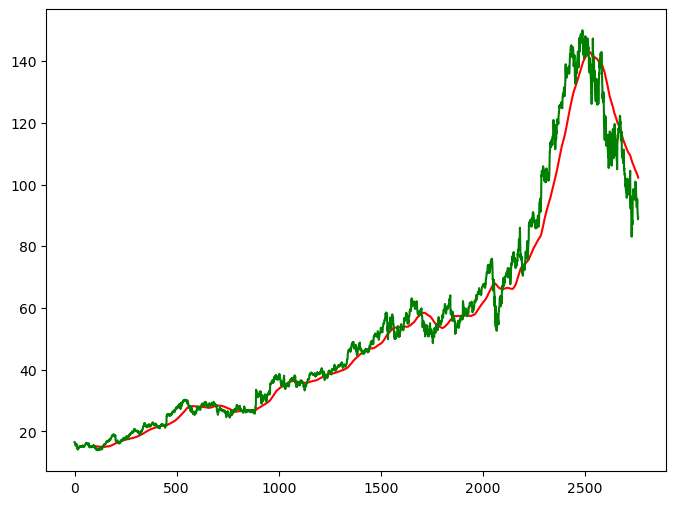

In [49]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [50]:
ma_200_days = data.Close.rolling(200).mean() # here for 200 days

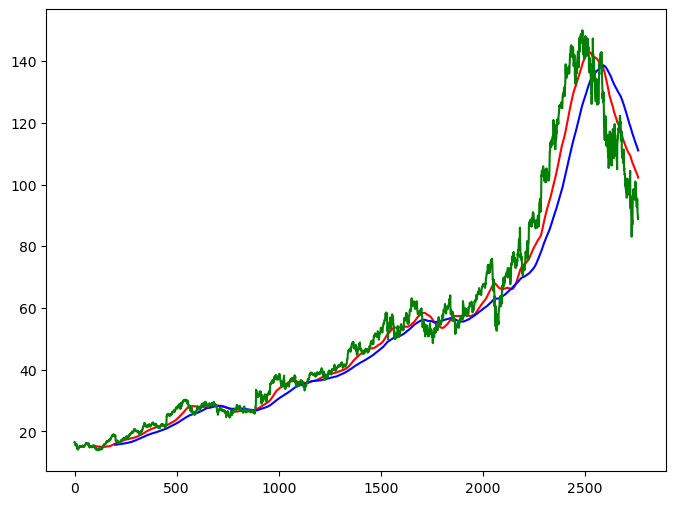

In [51]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [52]:
data.dropna(inplace=True)  # If there will be any null value then it will be clean

In [53]:
# Now distribution of data in testing i.e 20% and training i.e 80% is training
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [54]:
data_train.shape[0]

2208

In [55]:
data_test.shape[0]

553

In [56]:
from sklearn.preprocessing import MinMaxScaler  # used to fit our data in between  0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [57]:
data_train_scale = scaler.fit_transform(data_train)

In [58]:
# Array slicing by taking first 100 days into consideration to calculate the one on one stock market price
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [59]:
x, y = np.array(x), np.array(y)# Converting the data to numpy arrays

In [60]:
from keras.layers import Dense, Dropout, LSTM # keras layer is the independent
#layer and all the layers will be put in sequential manner so that the output
# of first layer will be the input of second layer and soo on
from keras.models import Sequential # used to predict the data based on the time series

ImportError: Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

Creating a model with the Sequential:
  1.in this we will be creating the 4 LSTM layers for the sequential model.
  2. eaach layer will be having different number of neurons as 'UNIT'.
  3.'relu' is the activation function .
  4.return_sequence says that the output of one layer will be the input of another layer and it will be not added in the last layer
  5. Dropout used mean values insted of actual values

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1)) # Predict the closing value only

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

In [ ]:
model.summary()

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()